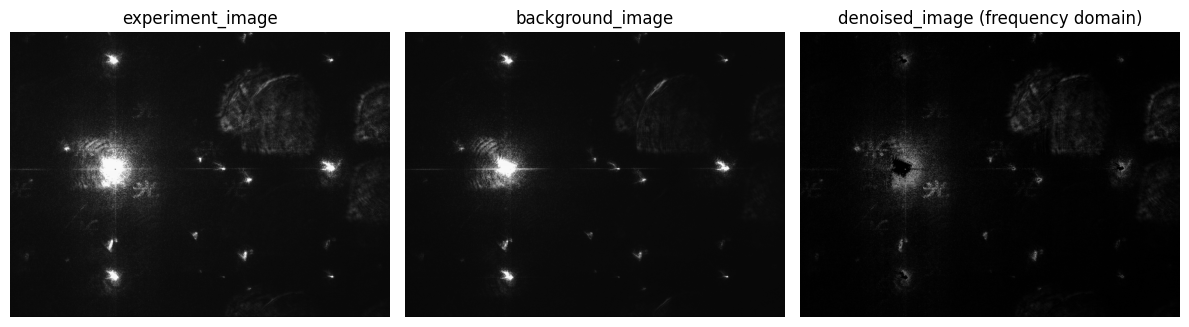

In [5]:
import numpy as np
from skimage import io
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt

# 将实验图像和本底图像转换到频域
experiment_fft = fftshift(fft2(experiment_image))
background_fft = fftshift(fft2(background_image))

# 去除本底的频谱
result_fft = experiment_fft - background_fft

# 将结果转换回空间域
result_image_freq = np.clip(np.abs(ifft2(ifftshift(result_fft))), 0, 255).astype(np.uint8)

# 显示结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("experiment_image")
plt.imshow(experiment_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("background_image")
plt.imshow(background_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("denoised_image (frequency domain)")
plt.imshow(result_image_freq, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# 保存结果图像
io.imsave('result_image_freq.png', result_image_freq)


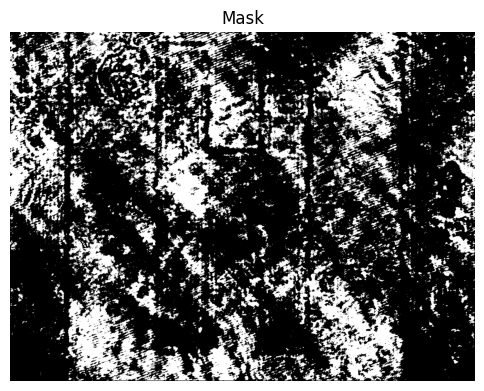

In [10]:
experiment_image_path = 'Edge_H.BMP'  # 实验图像路径
background_image_path = 'BackGround.BMP'  # 背景图像路径
# 读取实验图像和背景图像
experiment_image = io.imread(experiment_image_path, as_gray=True)
background_image = io.imread(background_image_path, as_gray=True)
# 确保图像是灰度图像
if experiment_image.ndim == 3:
    experiment_image = np.mean(experiment_image, axis=2)
if background_image.ndim == 3:
    background_image = np.mean(background_image, axis=2)
# 将图像转换为浮点数
experiment_image = experiment_image.astype(np.float32)
background_image = background_image.astype(np.float32)
# 归一化图像
experiment_image = (experiment_image - np.min(experiment_image)) / (np.max(experiment_image) - np.min(experiment_image))
background_image = (background_image - np.min(background_image)) / (np.max(background_image) - np.min(background_image))
# 计算背景图像的均值
background_mean = np.mean(background_image)
# 计算背景图像的标准差
background_std = np.std(background_image)
# 计算阈值
threshold = background_mean + 2 * background_std

# 计算掩模
mask = (experiment_image > background_image).astype(np.uint8)

# 显示掩模
plt.figure(figsize=(6, 6))
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

# 保存掩模图像
io.imsave('edge_mask.png', mask * 255)  # 将掩模值扩展到0-255范围以保存为图像